In [1]:
import torch
import torchvision
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
ROOT = '/wecare/home/khoi/thesis'
# CT scans and masks in raw nii format
DATA_FOLDER = '/wecare/projects/Slicer_ready_data/Original Patient Data/Normalised_Recsaled_data'
CT_SCANS = os.path.join(DATA_FOLDER,'Images')
MASKS = os.path.join(DATA_FOLDER,'Labels_nii')
# Dataset for the project
AUGMENTED_FOLDER = os.path.join(ROOT, 'ct_processed_aug')
AUGMENTED_SCANS = os.path.join(AUGMENTED_FOLDER, 'images') 
AUGMENTED_MASKS = os.path.join(AUGMENTED_FOLDER, 'masks')
AUGMENTED_LABELS = os.path.join(AUGMENTED_FOLDER, 'labels')
HYPEPARAMETERS = os.path.join(ROOT, 'parameters')

# Trying data augmentation on a normal image

In [14]:
ex_img = read_image(EXAMPLE_IMG)

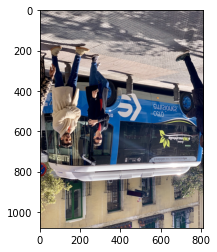

In [42]:
plt.imshow(torch.fliplr(ex_img).permute(1,2,0))

In [18]:
ex_img.permute(1,2,0).shape

torch.Size([1080, 810, 3])

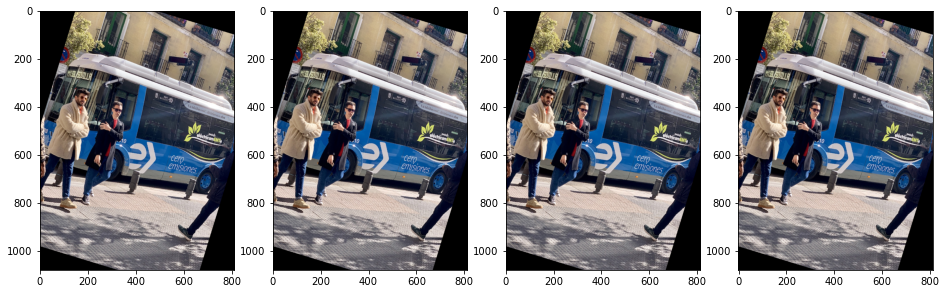

In [34]:
torch.manual_seed(42)
rand_deg = random.uniform(-30,30)
rotated_ex_imgs = [TF.rotate(ex_img,angle= rand_deg) for _ in range(4)]

fig, axs = plt.subplots(1,4, figsize = (16,12))
for i in range(4):
    axs[i].imshow(rotated_ex_imgs[i].permute(1,2,0))

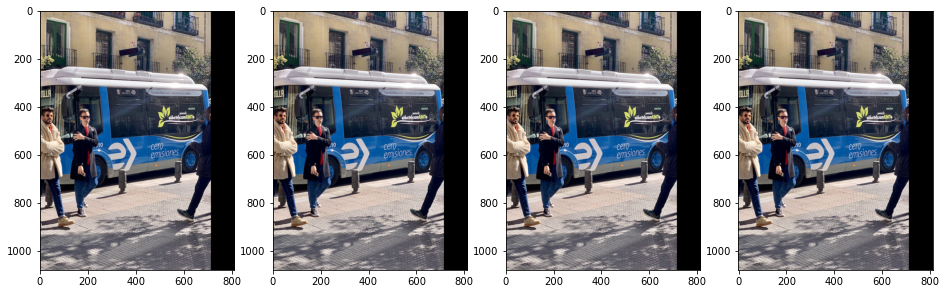

In [55]:
torch.manual_seed(42)
rand_deg = random.uniform(-30,30)
rotated_ex_imgs = [TF.affine(ex_img,angle = 0, translate = [-100,0], scale = 1, shear = 0) for _ in range(4)]

fig, axs = plt.subplots(1,4, figsize = (16,12))
for i in range(4):
    axs[i].imshow(rotated_ex_imgs[i].permute(1,2,0))

In [23]:
df = pd.read_csv(os.path.join(ROOT, "ct_processed_aug", "labels" , "CTP02_001_0623.txt"), sep = " ")
df

,0,0.5078125,0.5338541666666666,0.016927083333333332,0.013020833333333334


# Trying data augmentation on an image in the dataset

In [9]:
from skimage.measure import label, regionprops
import torchvision.io
from torchvision.io import read_image
from skimage.io import imread
import torchvision.transforms as T
import numpy as np
import os

AUG_MASKS = os.path.join(ROOT, 'ct_processed_aug', 'masks', 'fold_1')
AUG_IMGS = os.path.join(ROOT, 'ct_processed_aug', 'images', 'fold_1')
ex_mask = read_image(os.path.join(AUG_MASKS, 'CTP12_001_0179_aug09.png'), mode = torchvision.io.ImageReadMode.GRAY)
ex_img = read_image(os.path.join(AUG_IMGS, 'CTP12_001_0179_aug09.png'), mode = torchvision.io.ImageReadMode.GRAY)
ex_img.shape, ex_mask.shape

(torch.Size([1, 768, 768]), torch.Size([1, 768, 768]))

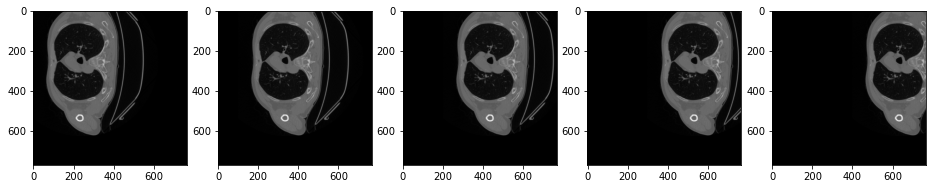

In [10]:
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as TF
import torch
import matplotlib

rand_deg = random.uniform(-30,30)
transformed_ex_imgs = [TF.affine(ex_img,angle = 0, translate = [i,0], scale = 1, shear = 0) for i in range(0, 500, 100)]

fig, axs = plt.subplots(1,5, figsize = (16,12))
for i in range(5):
    axs[i].imshow(transformed_ex_imgs[i].squeeze(), cmap = 'gray')

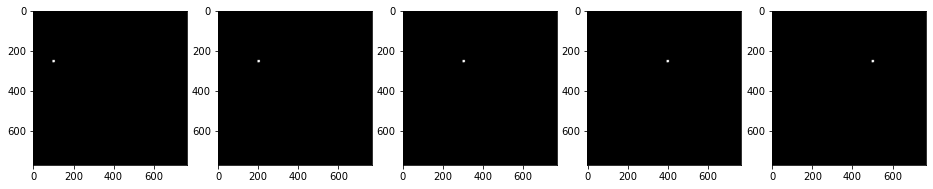

In [11]:
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as TF
import torch
import matplotlib

rand_deg = random.uniform(-30,30)
transformed_ex_masks = [TF.affine(ex_mask,angle = 0, translate = [i,0], scale = 1, shear = 0) for i in range(0, 500, 100)]

fig, axs = plt.subplots(1,5, figsize = (16,12))
for i in range(5):
    axs[i].imshow(transformed_ex_masks[i].squeeze(), cmap = 'gray')

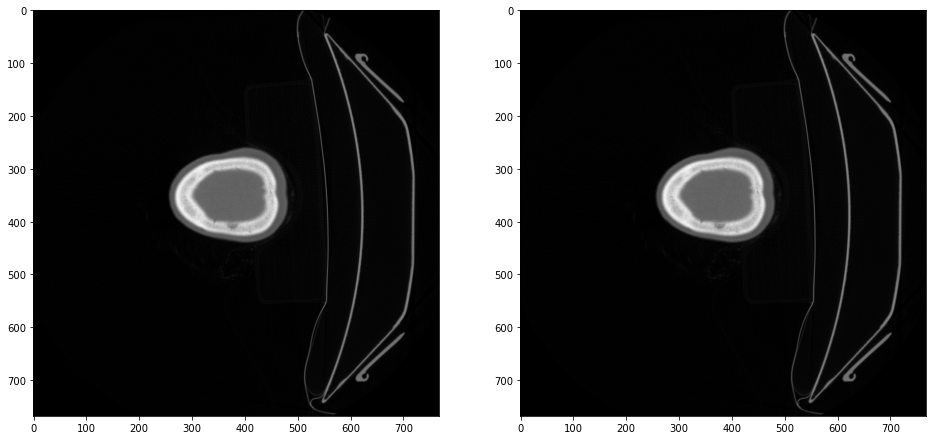

In [91]:
fliplr_img = [torch.fliplr(ex_img.squeeze()) for i in range(0, 2)]

fig, axs = plt.subplots(1,2, figsize = (16,12))
for i in range(2):
    axs[i].imshow(fliplr_img[i], cmap = 'gray')

In [94]:
fliplr_img[0].unsqueeze(0).shape

torch.Size([1, 768, 768])

In [67]:
ex_mask_aug = TF.affine(ex_mask,angle = 0, translate = [200,0], scale = 1, shear = 0)
mask_aug_label = label(ex_mask_aug.squeeze(), background = 0)
mask_aug_prop = regionprops(mask_aug_label)

In [79]:
ex_img_aug = TF.affine(ex_img,angle = 0, translate = [300,0], scale = 1, shear = 0)

In [68]:
mask_aug_prop[0].bbox

(406, 585, 416, 598)

In [11]:
foo_mask = read_image(os.path.join(AUGMENTED_MASKS, 'CTP78_002_0423.png'), mode = torchvision.io.ImageReadMode.GRAY)

In [ ]:
foo_mask.squeeze_()

In [15]:
foo_mask.shape

torch.Size([768, 768])

In [16]:
np.unique(foo_mask, return_counts=True)

(array([  0,  64, 128, 191, 255], dtype=uint8),
 array([588591,     16,    106,     19,   1092]))

In [20]:
from skimage.measure import label, regionprops
foo_label = label(foo_mask != 0)
len(regionprops(foo_label))

3

 width translate 112.39240416368256, heigh translate -131.37441645930656
There are 67 lesions in this augmented slice
 width translate -102.49403738713126, heigh translate 187.88749079993897
rotate deg -23.913388544982574
There are 68 lesions in this augmented slice
 width translate 189.9717036149832, heigh translate 180.99592834663878
rotate deg -3.8155927752592653
There are 68 lesions in this augmented slice
 width translate 160.33821471811365, heigh translate 183.71786100586428
There are 67 lesions in this augmented slice
 width translate -178.80090117800026, heigh translate 154.69653501737622
There are 67 lesions in this augmented slice
 width translate 67.92825044106462, heigh translate -159.68465497128977
rotate deg -3.5910452923416543
There are 70 lesions in this augmented slice
 width translate -151.9987087782706, heigh translate -74.76609867300907
rotate deg 17.39592270707415
There are 67 lesions in this augmented slice
 width translate 103.62754986218181, heigh translate 103.

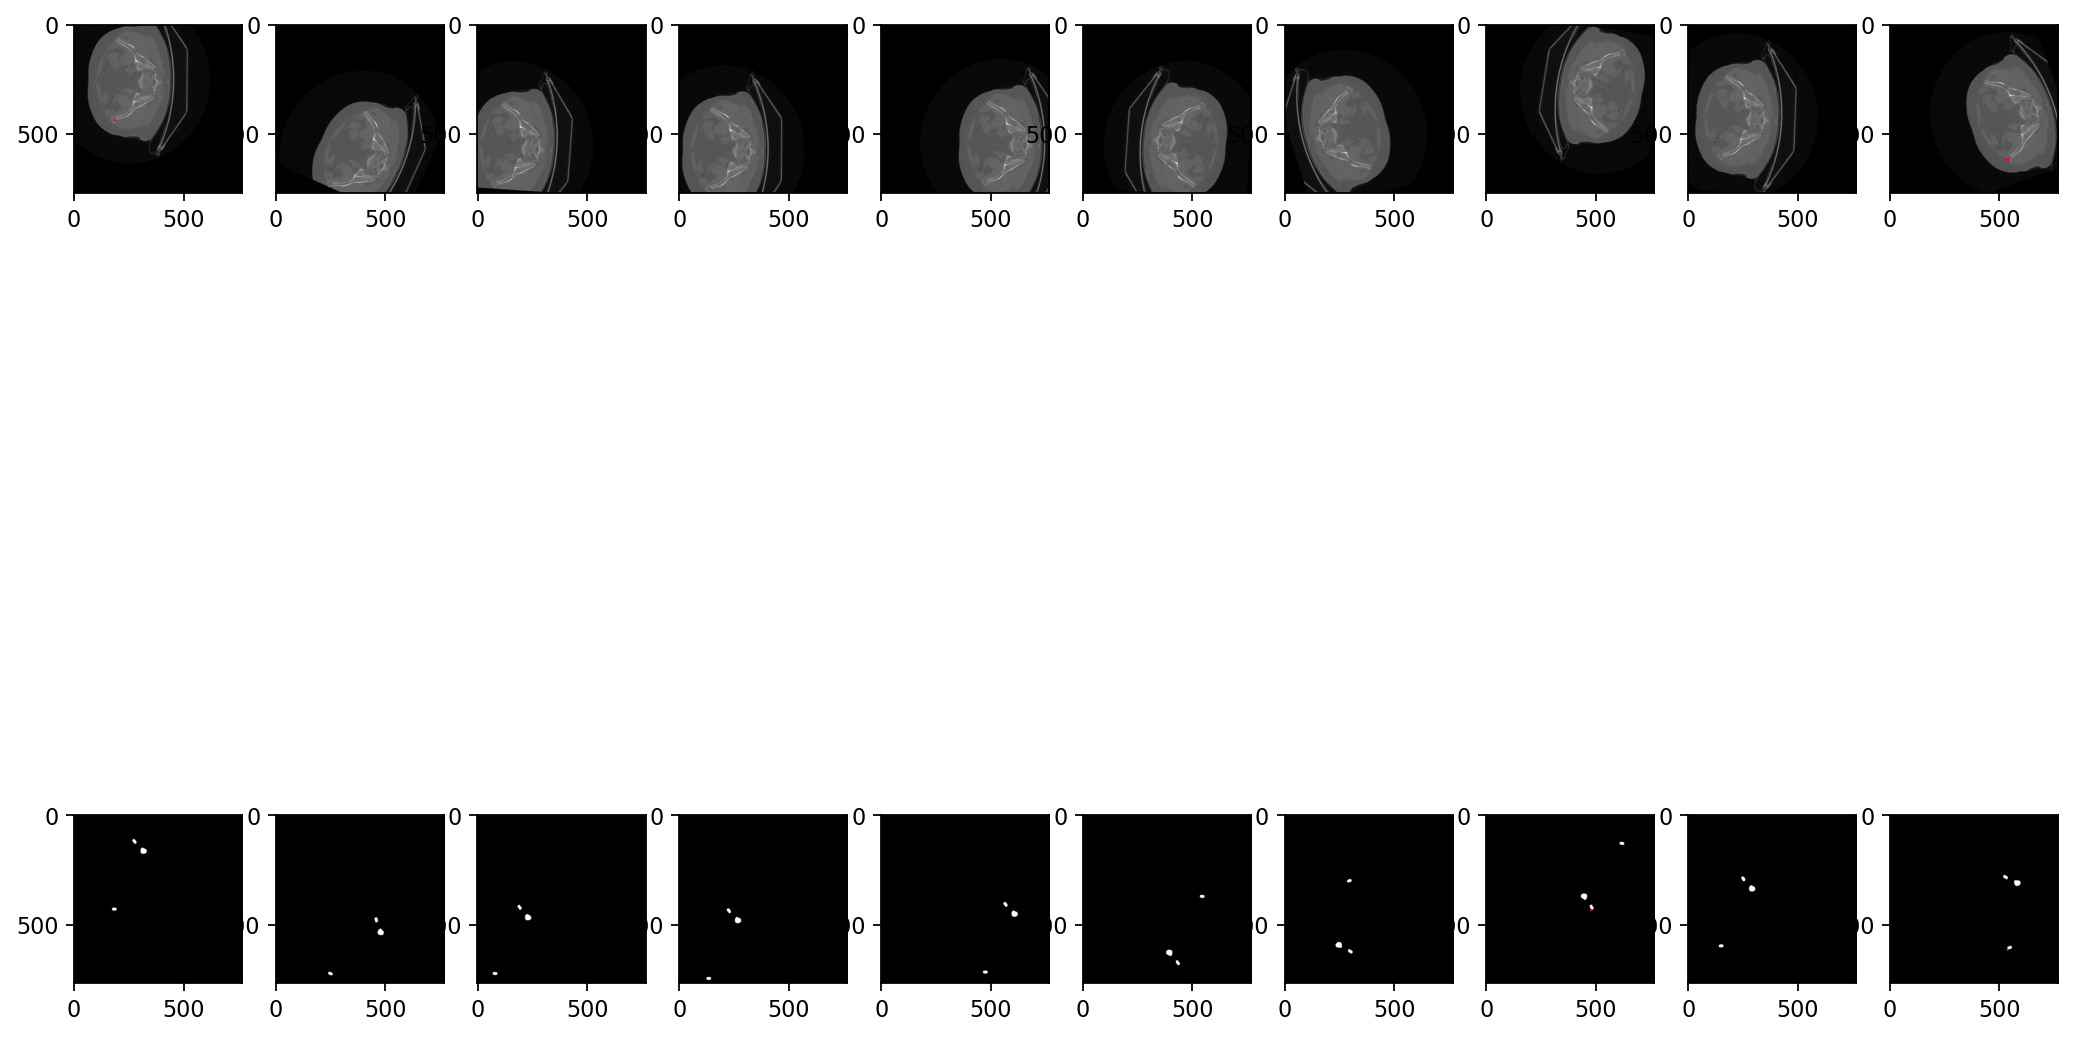

In [6]:
import matplotlib.pyplot as plt
import os
from utils import lesion_tools, data
import matplotlib.patches as patches

etz_data = data.ETZ(AUGMENTED_SCANS, AUGMENTED_MASKS, AUGMENTED_LABELS, transform=True, seed = None)
i = 0
k = 10
fig, axs = plt.subplots(2,10, figsize = (16,12), dpi = 160)

while i < k:
    image_aug, mask_aug = etz_data["CTP78_002_0423"]
    image_aug, mask_aug = image_aug.squeeze(), mask_aug.squeeze() 
    lesion_props = lesion_tools.get_lesion_props(mask_aug, background=0) # 0 is black, 255 is white
    if len(lesion_props) > 0:
        print(f"There are {len(lesion_props)} lesions in this augmented slice")
        for lesion in range(len(lesion_props)):
            center = tuple(map(int, lesion_props[lesion].centroid))
            bbox_height, bbox_width = lesion_props[lesion].image.shape
            img_width, img_height = mask_aug.shape
            props_norm = lesion_tools.normalize_lesions_props((center[1], center[0]), (bbox_width, bbox_height), (img_width, img_height))
            # Write bounding box coordinates and centers of augmented images 
            #print(f"lesion {lesion} bbox center: {props_norm[0][0]} {props_norm[0][1]} bbox width + height: {props_norm[1][0]} {props_norm[1][1]}\n")
            # Save the augmented image
        rect_img = patches.Rectangle((lesion_props[lesion].bbox[1], lesion_props[lesion].bbox[0]) , bbox_width, bbox_height ,linewidth = 1, edgecolor = 'r', facecolor = 'none')
        rect_mask = patches.Rectangle((lesion_props[lesion].bbox[1], lesion_props[lesion].bbox[0]) , bbox_width, bbox_height ,linewidth = 1, edgecolor = 'r', facecolor = 'none')
        axs[0][i].imshow(image_aug,
                    cmap = plt.gray())
        axs[0][i].add_patch(rect_img)
        # Save the augmented mask
        axs[1][i].imshow(mask_aug,
                    cmap = plt.gray())
        axs[1][i].add_patch(rect_mask)
        # We only increase i when the augmented image still has lesions. Else we generate an augmented image again.
        i += 1

# Performing data augmentation